# Visualization


The visualization of the results of an analysis represents one of the most delicate and important steps in data analysis, and typically tells a lot about the quality of the analysis itself. A good and bad examples are:
   * the discovery of the [Higgs boson](https://twiki.cern.ch/twiki/pub/CMSPublic/Hig13002TWiki/HZZ4l_animated.gif)
   * the claim of [superluminal neutrinos](https://arxiv.org/pdf/1109.4897v1.pdf)

Graphics (plots) should convey as much information as possible, in an intuitive way (should require little or no explanation), and without sacrificing the clarity.

### Histograms

Histograms are representations of the distribution of a certain feature of the data. Histograms can be thought as scalar functions, $f(x): {\rm I\!R}^n \to {\rm I\!R}$, where at most $n=2$. Histograms are often used to compare different distributions, for instance the data and its expectation (e.g. simulation). 

Histograms are **binned**, which means that the domain is divided in intervals ("bins"). The content of the bin $i$ is  $n_i=\frac{\int_{x_{i}}^{x_{i+1}} f(x)}{x_{i+1}- x_{i}}$.

Bins doesn't need to have the same width

If the bin size is small, $\lim_{x_{i+1}- x_{i} \to 0} n_i \simeq f(\frac{x_{i+1}+x_{i}}{2})$.



Choosing the number of bins and thus the bin size requires a special care. Typically, the content of each $i$th bin, $n_i$, should be statistically significant, i.e. the corresponding Poisson uncertainty, $1/\sqrt{n_i}$, should be small compared to $n_i$.

In general, the uncertainties affecting the data (or the expectation) should be reported as error bars, especially if the distribution is normalized or comes from a simulation (and thus needs to be weighted).

**NOTE:** the Poisson uncertainty is valid only for random counts; in all other cases, the appropriate uncertainty should be derived.

#### Shape and Normalization

The are essentially two main quantities that are carried by an histogram:

   * The total amount of data, which is referred to as "normalization"
   * The "shape" or differential distribution, which should follow the underlying p.d.f
   

To normalize, divide by $N$ or $I=\int f(x) dx$. 

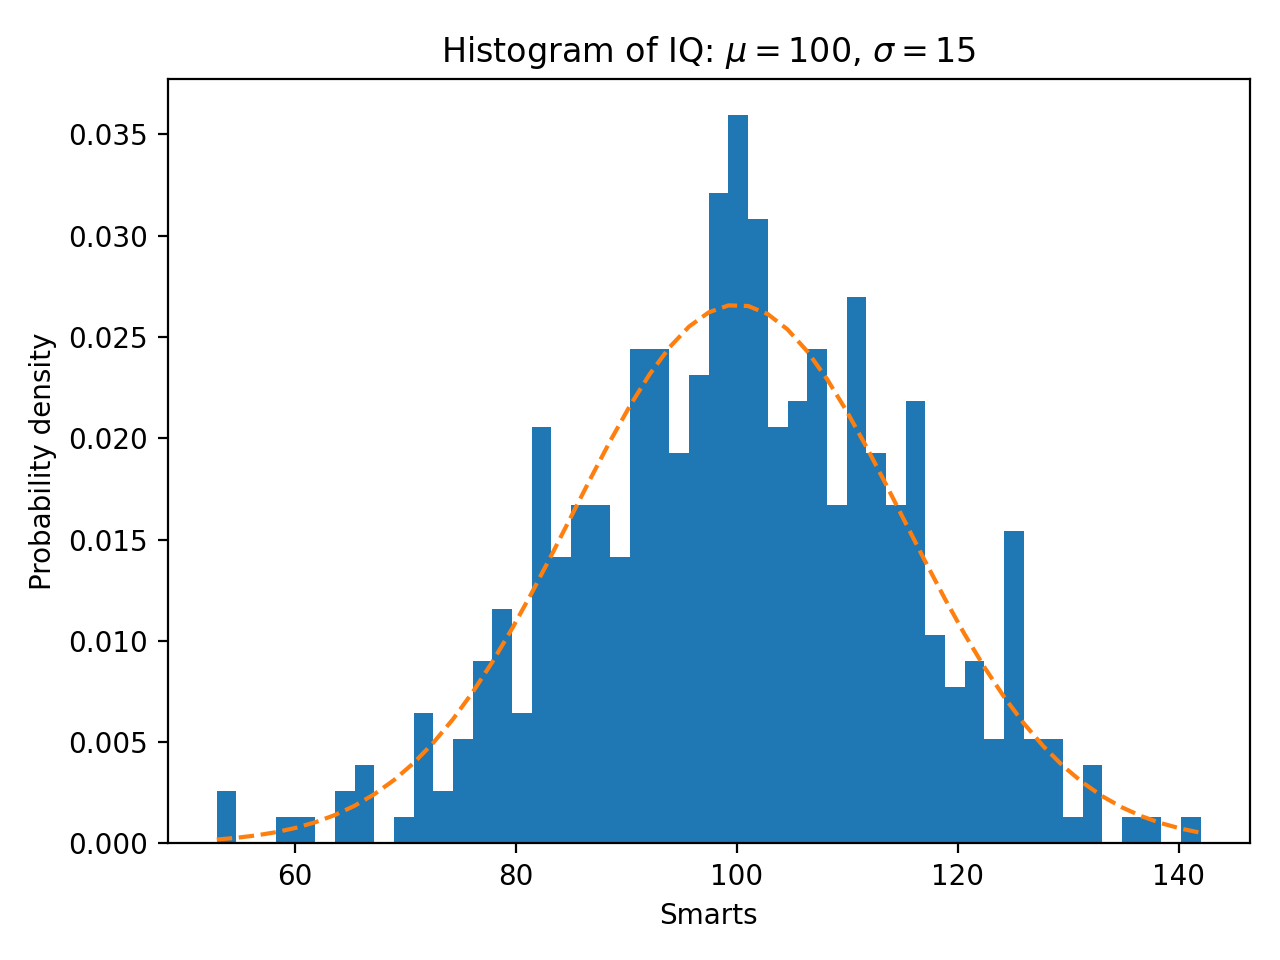

In [1]:
from IPython.display import Image
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Image("https://matplotlib.org/stable/_images/sphx_glr_histogram_features_001_2_0x.png", width=600)

### Scatter plots

Scatter plots are used to compare two features, in order to visually detect possible correlations between them. 

Scatter plots can be *unbinned* or *binned*.
- Unbinned scatter plots are often prefered until the number of point isn't too large, after which the plot is not readable anymore. The display of different features is also possible by using a different marker or color for the data points.

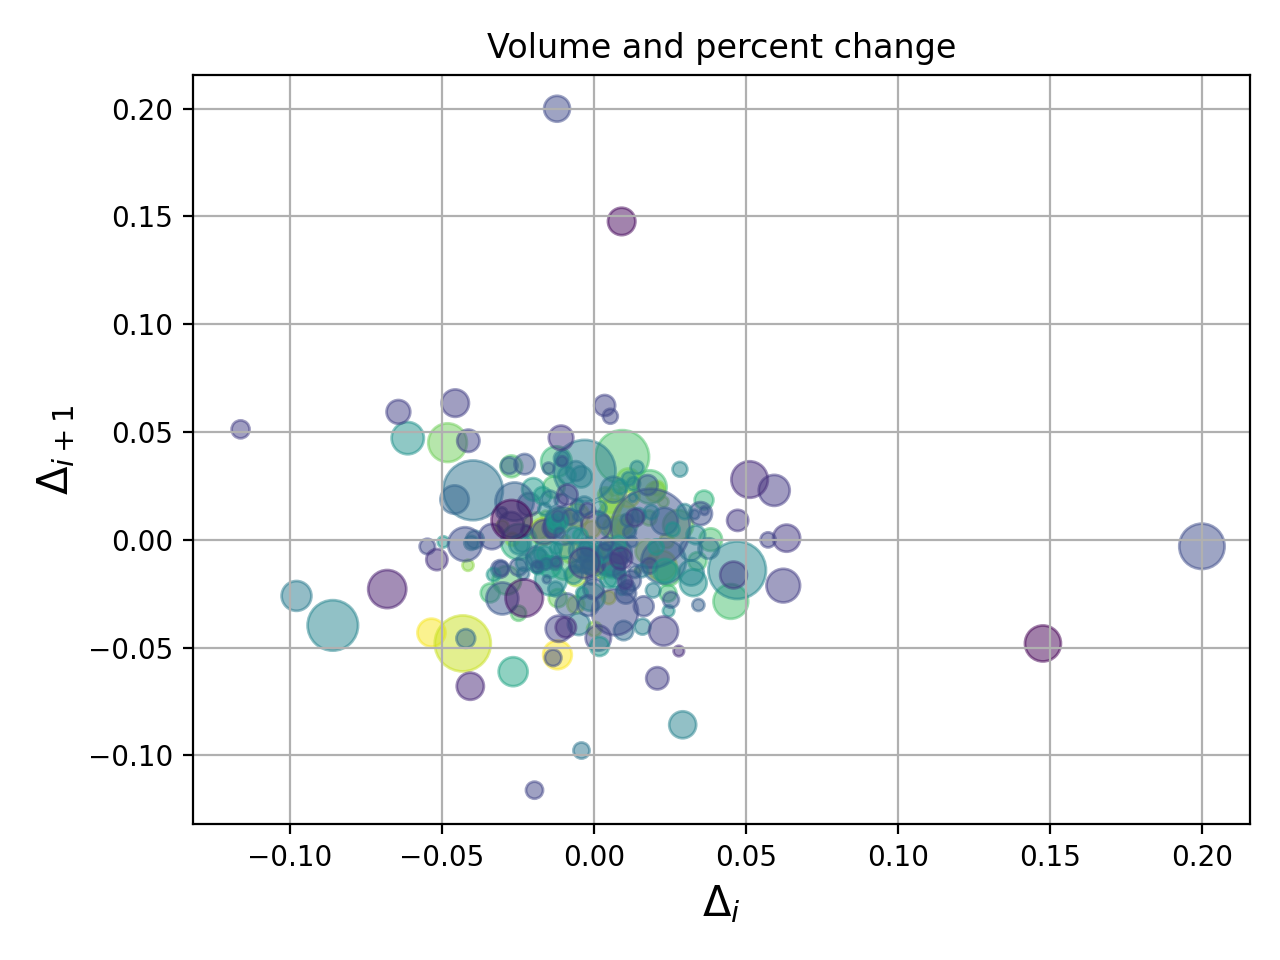

In [3]:
Image("https://matplotlib.org/stable/_images/sphx_glr_scatter_demo2_001_2_0x.png", width=600)

- Binned scatter plots are, as a matter of fact, 2D histograms. The bin content $n_i$ is represented through a color code indicating the "3rd dimension". Alternatively, this can be shown as a "contour plot", i.e. with smoothened edges and color-coded levels.

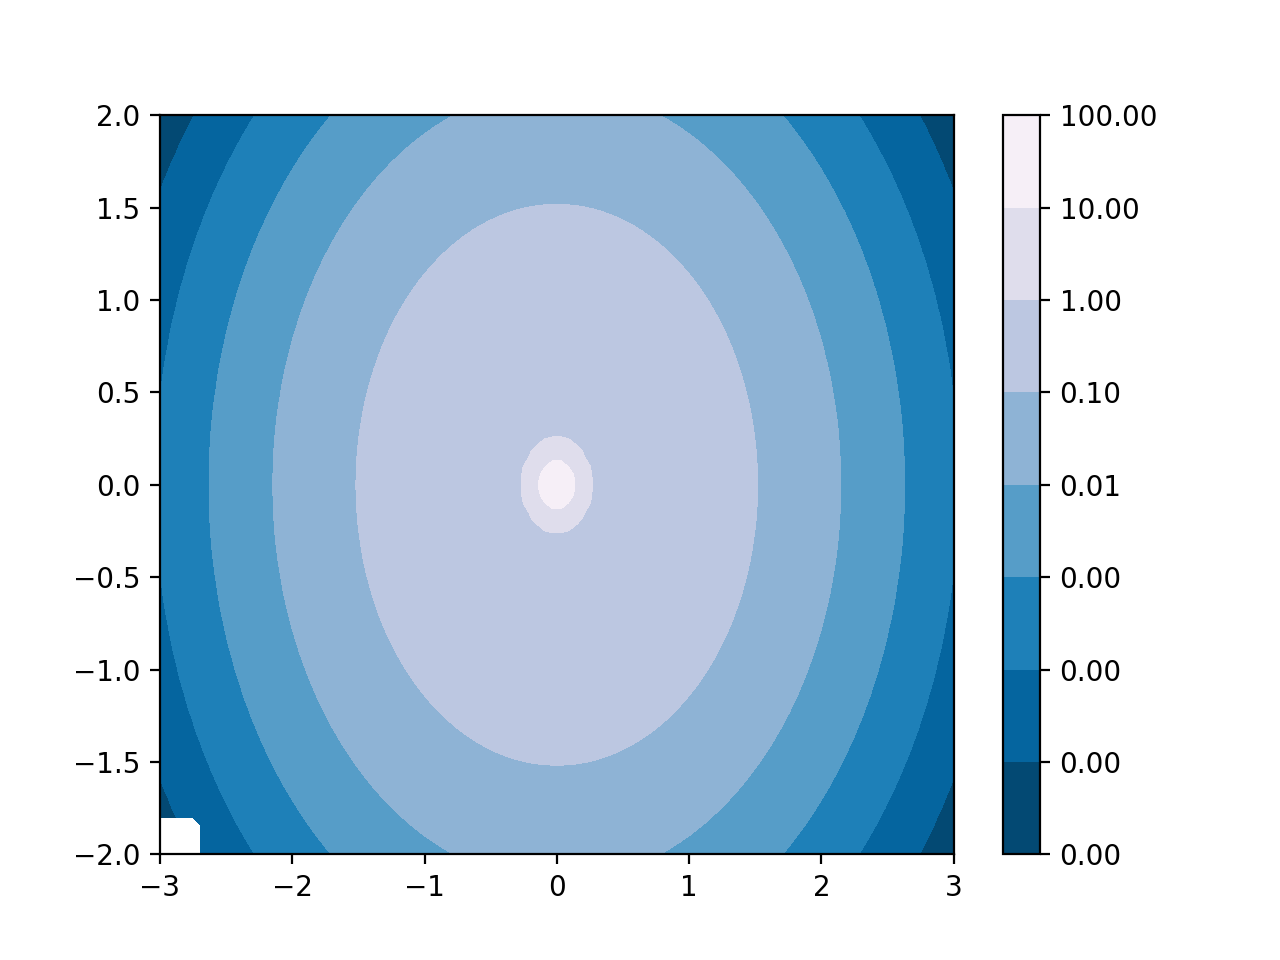

In [4]:
Image("https://matplotlib.org/stable/_images/sphx_glr_contourf_log_001_2_0x.png", width=600)

The condensation of the scatter plots into "profiles" is also very useful. The data are binned along the $x$ (if you had to bin on the other variable, just invert the axes), and for every bin the mean and the standard deviation of the corresponding $y$ values are calculated and reported as data points and their uncertainties, respectively.

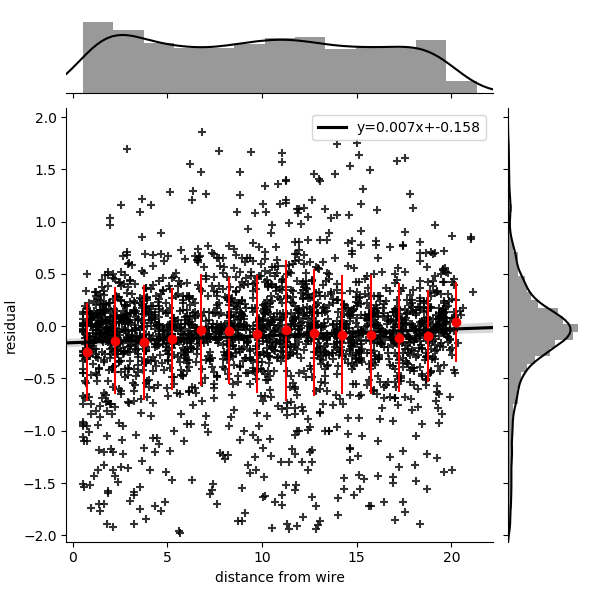

In [5]:
Image("profile.png")

### Other kinds of plots

There are an almost infinite number of other plots, but in some way or another, they can be tracked back to scatter plots and histograms.

A non-exhaustive list can be seen in the [Matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show).



## Matplotlib (pyplot)

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It provides an intuitive set of tools to visualize the data, and is well integrated with Python libraries e.g. numpy.
With relatively few commands, it allows everybody to produce readable and high-quality plots.
Link to the [documentation](https://matplotlib.org/stable/index.html).

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

A plot is a container of nested Python objects. 

Una *Figure* contiene piu *Axes* (plot), che al loro interno hanno *Axis*, *Labels*, *Title*...

In [7]:
from IPython.display import Image
Image(url='https://files.realpython.com/media/fig_map.bc8c7cabd823.png')

Figure(432x288)


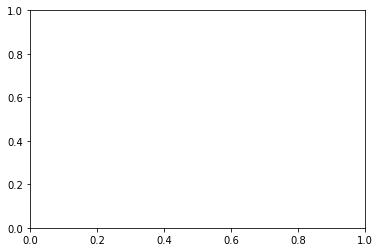

In [7]:
f, _ = plt.subplots() #subplots() create 2 variable, the Figure and an Axes
print(f)

`plt.subplots()` creates a Figure object and a “throwaway” variable (in this case).

Use the attribute (.) notation to select child objects.

Major tick is an object: <class 'matplotlib.axis.YTick'>
Ticks and names: 
 [0.  0.2 0.4 0.6 0.8 1. ] [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]


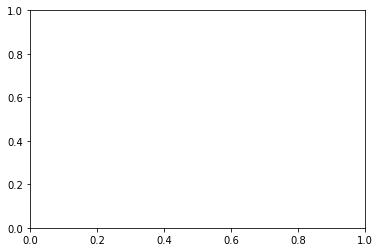

In [10]:
one_tick = f.axes[0].yaxis.get_major_ticks()[0] #take major tick of the y axis of the Axes
print("Major tick is an object:",type(one_tick))

ticks, labels = plt.xticks() #restituisce i ticks di x e i loro nomi
print("Ticks and names: \n",ticks, labels)

In the example above, `fig` (an instance of the Figure class) has multiple Axes (a list, for which we take the first element). Each Axes has a yaxis and xaxis, each of which have a collection of “major ticks,” and we grab the first one.

Matplotlib documentation presents this as a figure anatomy, rather than an explicit hierarchy:

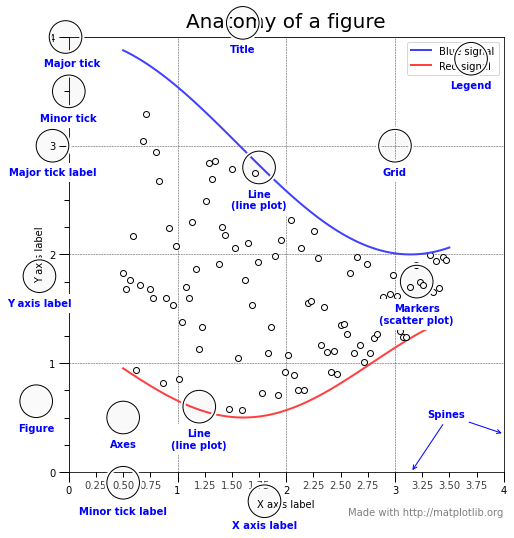

In [11]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

### Stateful Versus Stateless Approaches

* **Statefull** approach: chiama direttamente la funzione per fare il plot e disegna nell'ultimo axes creato. Utile per lavorare su una figure con 1 axes
* **Stateless** approach (object oriented): la funzione per fare il grafico viene chiamata per l'Axes desiderato. Utile quando si hanno 2 o piu grafici in una figure.

The `plt.plot()` automatically recall (or create) the last Axes created:

``` python
# inside matplotlib/pyplot.py
def plot(*args, **kwargs):
    """An abridged version of plt.plot()."""
    ax = plt.gca() #Get the last Axes of the current Figure.
    return ax.plot(*args, **kwargs)
```

### A few simple examples

#### 1) Stateful approach: hist
   - `fig, ax = plt.subplots() ` create figure and axes
   - `h, bins, _ = plt.hist(...)` called directly, create and show the histgram on the last axes created (*stateful approach*)
   - `tight_layout()` clean up whitespace padding from the figure

Histogram content: [0.         0.         0.         0.08333333 0.08333333 0.08333333
 0.16666667 0.125      0.33333333 0.41666667 0.33333333 0.375
 0.41666667 0.25       0.16666667 0.45833333 0.29166667 0.20833333
 0.125      0.04166667 0.16666667 0.         0.         0.
 0.04166667]
Bin boundaries: [-3.   -2.76 -2.52 -2.28 -2.04 -1.8  -1.56 -1.32 -1.08 -0.84 -0.6  -0.36
 -0.12  0.12  0.36  0.6   0.84  1.08  1.32  1.56  1.8   2.04  2.28  2.52
  2.76  3.  ]


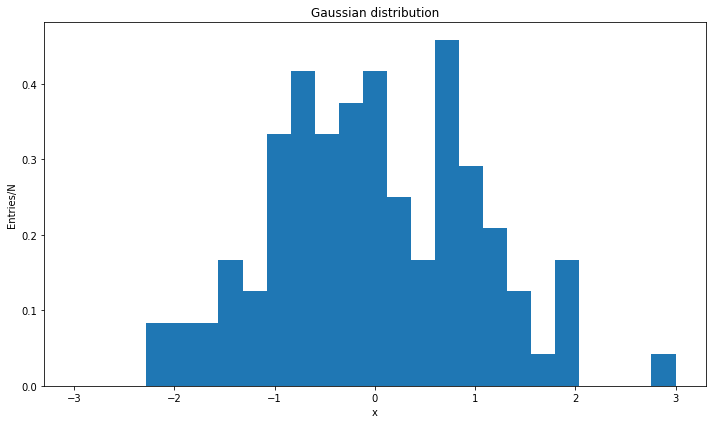

In [20]:
nrnd = np.random.normal(loc=0., scale=1., size=(100,)) # 100 random Gaussian number 

fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
h, bins, _ = plt.hist(nrnd, bins=25, range=(-3, +3), density=True, cumulative=False) # create and plot the histogram
ax.set_title('Gaussian distribution')
ax.set_xlabel('x')
ax.set_ylabel('Entries/N')
fig.tight_layout()

print("Histogram content:", h)
print("Bin boundaries:", bins)

#### 2) Stateless approach: stackplot

   - 3 random increased series from 1950 to 2000
   - define fig and ax with `plt.subplots()`
   - the `ax` Axes is called to create the graph, title, labels... (*stateless approach*). 
   
By using the specific `ax` object, there is no ambiguity about which Axes will contain the plot.

NOTA: stackplot fa la somma delle tre serie. Es: verde = giallo + blu + valore del verde

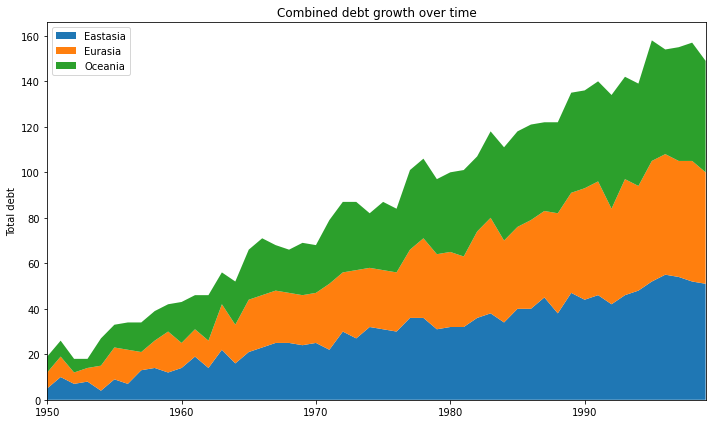

In [25]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size)) # create a 3 x 50 array with random int numbers from 0 to 10
yrs = 1950 + rng # from 1950 to 2000 

fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania']) # stackplot, the 3 components are summed
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(left=yrs[0], right=yrs[-1]) #Change the x range
fig.tight_layout()

#### 3) 2 Axes: scatter and hists

``` python
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
# ax is now a numpy array of axes's
```
We do operations on `ax1` and `ax2` individually, with stateless approach.

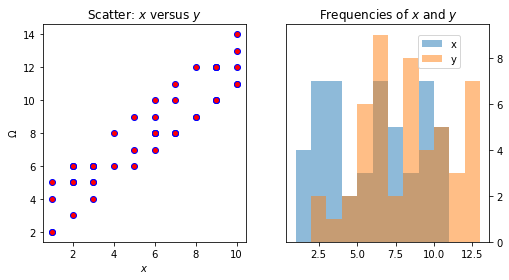

In [50]:
x = np.random.randint(low=1, high=11, size=50) #u(1,10) int
y = x + np.random.randint(1, 5, size=x.size) #x + u(1,4) int

# figure with 2 Axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

#Axes 1
ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$\Omega$') #Latex on labels


#Axes 2
ax2.hist(x, bins=np.arange(x.min(), y.max()), label='x', alpha=0.5)
ax2.hist(y, bins=np.arange(y.min(), y.max()), label='y', alpha=0.5)
#alternative
#data = np.column_stack((x, y)) # join the two numpy arrays
#ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('x', 'y')) #hist a fianco
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right() # move the y axis ticks to the right of the plot

#### 4) Colour scatter + hists

In [70]:
#Open file tar from url
from io import BytesIO
import tarfile #to open tar file
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [56]:
print(housing.shape)
print(housing[0])

(20640, 9)
[-1.2223e+02  3.7880e+01  4.1000e+01  8.8000e+02  1.2900e+02  3.2200e+02
  1.2600e+02  8.3252e+00  4.5260e+05]


Defining features from the array

In [71]:
z = housing[:, -1]
pop, age = housing[:, [4, 7]].T #Trick to select more than 1 columns at time
print(z, '\n', pop, '\n', age)

[452600. 358500. 352100. ...  92300.  84700.  89400.] 
 [ 129. 1106.  190. ...  485.  409.  616.] 
 [8.3252 8.3014 7.2574 ... 1.7    1.8672 2.3886]


`plt.subplot2grid` per creare axes su una griglia

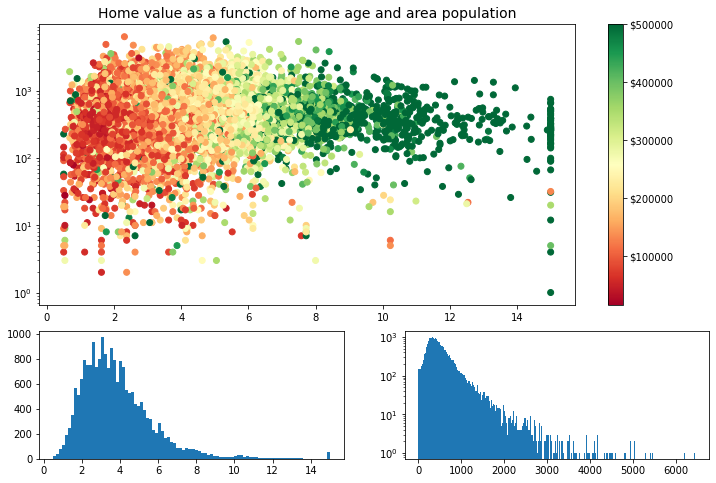

In [73]:
fig = plt.figure(figsize=(12, 8))
gridsize = (3, 2) #tabella 3x2


ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2) # 1 plot, posizione 0,0; largo e lungo 2x2 celle
scatter = ax1.scatter(x=age, y=pop, c=z, cmap='RdYlGn') # scatter in ax1
plt.colorbar(scatter, ax=ax1, format='$%d') #colorbar in dollars for ax1
ax1.set_title('Home value as a function of home age and area population', fontsize=14)
ax1.set_yscale('log') #log scale on y

# single variables histograms
ax2 = plt.subplot2grid(gridsize, (2, 0)) #plot posizione 2,0; 1 cella
n2, bins2, patches2 = ax2.hist(age, bins='auto')

ax3 = plt.subplot2grid(gridsize, (2, 1))
n3, bins3, patches3 = ax3.hist(pop, bins='auto', log=True)

## Seaborn
Seaborn, utile per i grafici con i dataframe. Si appoggia su matplotlib ed e molto integrata con pandas

In [18]:
import seaborn as sns
sns.set(style="white")

### Seaborn's Replot
A default dataset in seaborn

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


`sns.relplot()` aggiunge dimensioni ai markers, quindi cambiando colore o dimensione (link to [documentation](https://seaborn.pydata.org/generated/seaborn.relplot.html)) 
Vedi anche, `sns.scatterplot()`.

Categorical markers

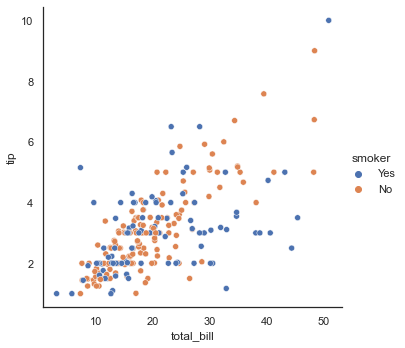

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

Quantitative "3rd dimension" with colours

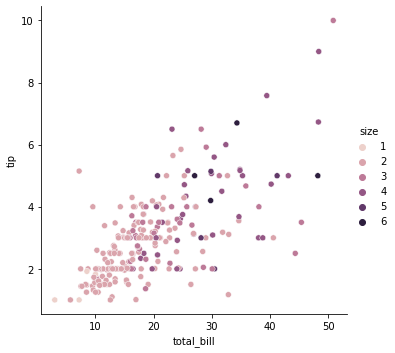

In [9]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

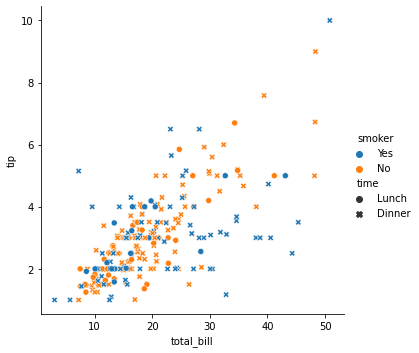

In [8]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

And with marker size:

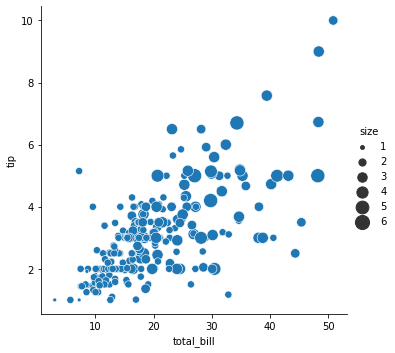

In [11]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

### Histograms and displot

Seaborn's `histplot()` ([documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html))

<AxesSubplot:ylabel='Count'>

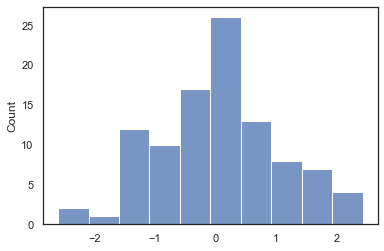

In [10]:
x = np.random.randn(100)
sns.histplot(x=x)

`displot()` ([documentation](https://seaborn.pydata.org/generated/seaborn.displot.html)) create R's "density plots". It provides the estimation of the pdf of the histogram with the ([KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation)) (kernel density estimation) method. 

A gaussian distribution is drawn from each bin and then they are summed up.

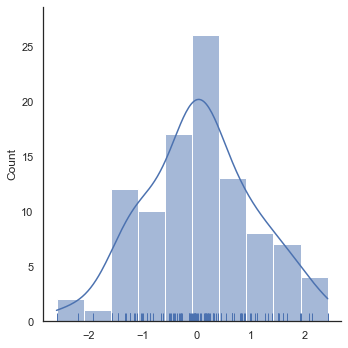

In [12]:
sns.displot(x=x, kde=True, rug=True)

### Jointplot

The `sns.jointplot()` ([documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html)) allows to visualize at the same time both the scatter plot between two features and show their projections along the axes.

In [33]:
import pandas as pd
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 500)
df = pd.DataFrame(data, columns=["x", "y"])

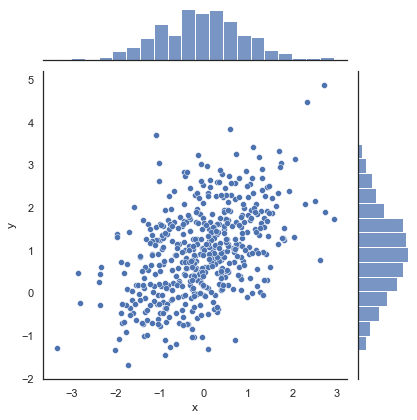

In [25]:
sns.jointplot(x="x", y="y", data=df)

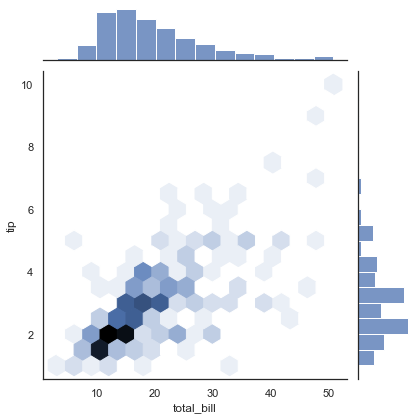

In [30]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex") #jointplot con esagoni 

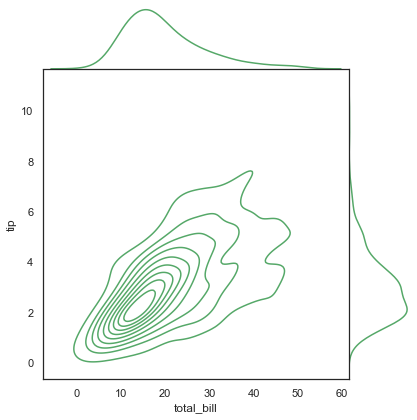

In [36]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde", space=0, color="g") #joint contour plot


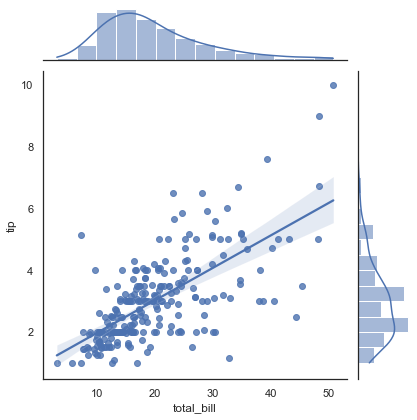

In [35]:
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg") #joint countour with linear fit

### KDEplot
Un tipo di scatter plot, con il colore che indica la densita

<AxesSubplot:xlabel='x', ylabel='y'>

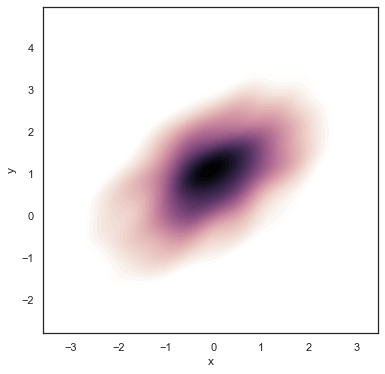

In [21]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False) # define color palette

sns.kdeplot(x=df["x"], y=df["y"], cmap=cmap, n_levels=60, shade=True) # alternate method to pass the DataFrame data


### Chasing correlations

`pairplot` per scatter plot di correlazione tra tutte le variabili del dataframe

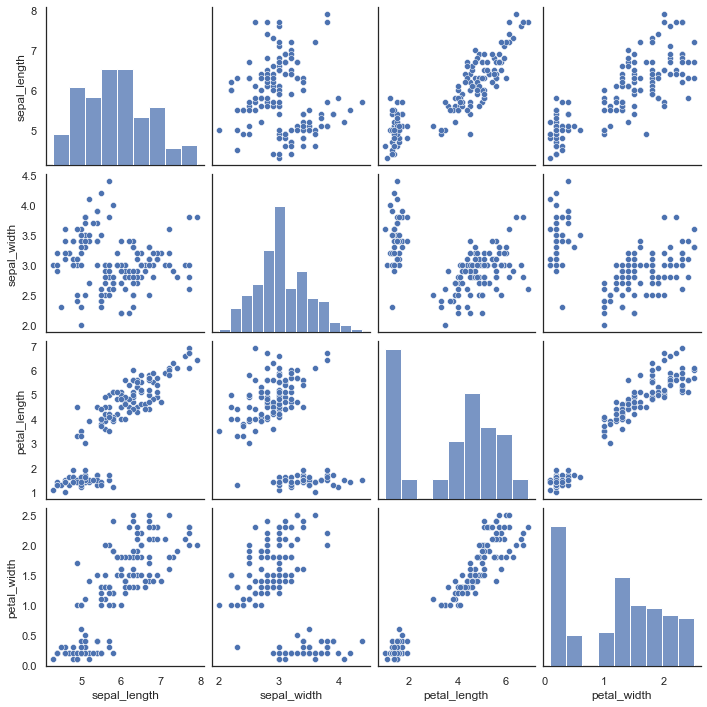

In [37]:
sns.pairplot(iris)

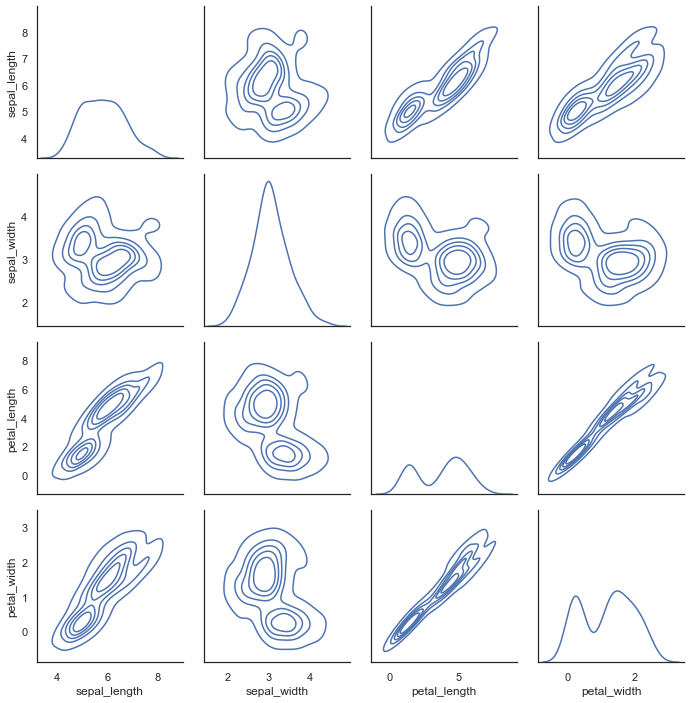

In [41]:
#pairplot contour version
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot) #KDE lungo la diagonale
g.map_offdiag(sns.kdeplot, n_levels=6) #KDE pairwise fuori dalla diagonale

## Plot accessibility (Bokeh, Plotly, etc.)
To make nice html dynamic graphs to upload on the web

Other tools like [Dash](https://plot.ly/products/dash/) are extremely powerful and worth checking out.

In [43]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]

# output to static HTML file
output_file("log_lines.html")

# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
   x_axis_label='sections', y_axis_label='particles'
)

# add some renderers
p.line(x, x, legend_label="y=x")
p.circle(x, x, legend_label="y=x", fill_color="white", size=8)
p.line(x, y0, legend_label="y=x^2", line_width=3)
p.line(x, y1, legend_label="y=10^x", line_color="red")
p.circle(x, y1, legend_label="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend_label="y=10^x^2", line_color="orange", line_dash="4 4")

# show the results
show(p)